In [4]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [5]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [8]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [9]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8923 - loss: 0.3041
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8950 - loss: 0.2929
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8988 - loss: 0.2879
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9010 - loss: 0.2750
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9053 - loss: 0.2633


In [14]:
result.history.keys()

dict_keys(['accuracy', 'loss'])

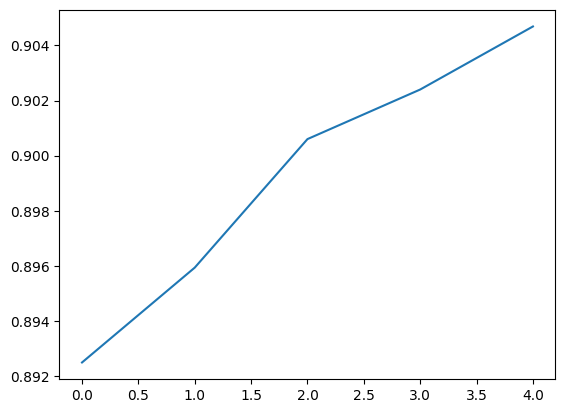

In [17]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy']) # 올라감

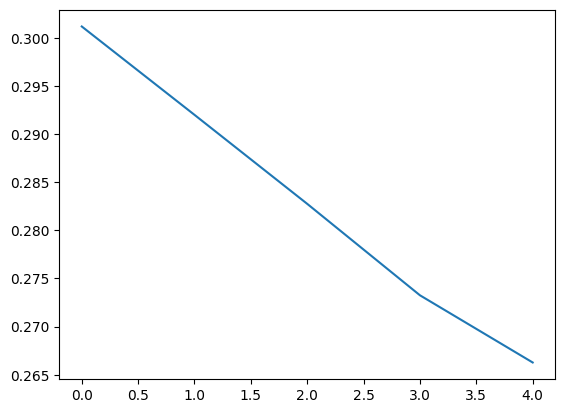

In [18]:
plt.plot(result.history['loss']) # 내려감

In [19]:
result = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9064 - loss: 0.2621
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9131 - loss: 0.2483
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9148 - loss: 0.2442
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9163 - loss: 0.2386
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9175 - loss: 0.2309
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9194 - loss: 0.2304
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9196 - loss: 0.2236
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9220 - loss: 0.2198
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9249 - loss: 0.2181
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9253 - loss: 0.2100
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9258 - loss: 0.2179
Epoch 12/20
1407/1407 ━━━━━━━━

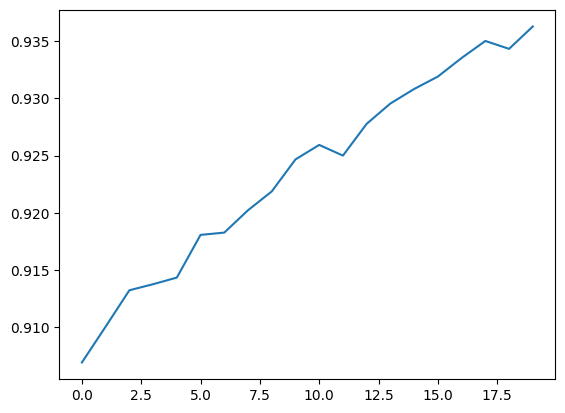

In [20]:
plt.plot(result.history['accuracy'])

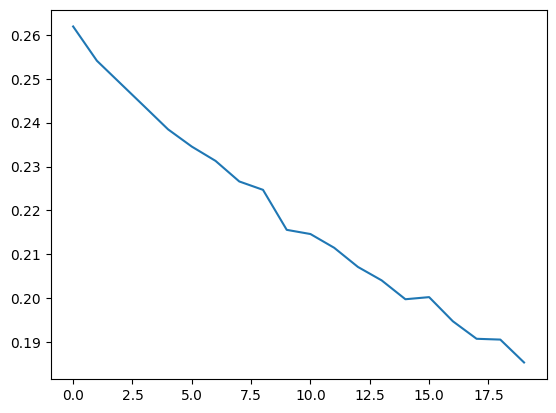

In [21]:
plt.plot(result.history['loss'])

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7578 - loss: 0.6974 - val_accuracy: 0.8495 - val_loss: 0.4289
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8513 - loss: 0.4107 - val_accuracy: 0.8390 - val_loss: 0.4391
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8677 - loss: 0.3611 - val_accuracy: 0.8709 - val_loss: 0.3665
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8760 - loss: 0.3395 - val_accuracy: 0.8737 - val_loss: 0.3693
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8857 - loss: 0.3162 - val_accuracy: 0.8747 - val_loss: 0.3603
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8870 - loss: 0.3100 - val_accuracy: 0.8792 - val_loss: 0.3475
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8919 - loss: 0.2949 - val_accuracy: 0.8828 - val_loss: 0.3447
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8994 - loss: 0.2773

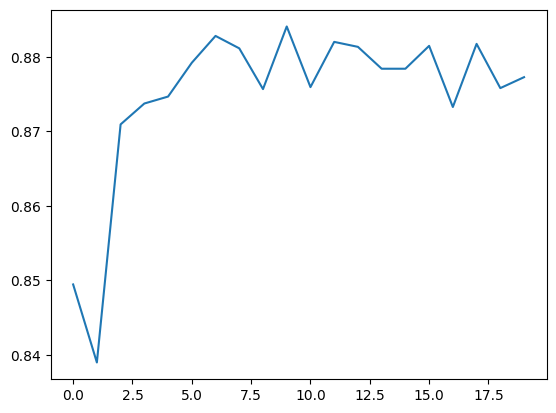

In [28]:
plt.plot(result.history['val_accuracy'])

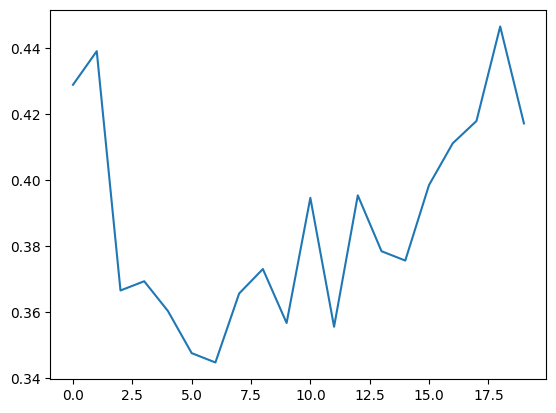

In [27]:
plt.plot(result.history['val_loss'])

In [31]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7652 - loss: 0.6783 - val_accuracy: 0.8430 - val_loss: 0.4318
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8541 - loss: 0.4048 - val_accuracy: 0.8672 - val_loss: 0.3853
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8694 - loss: 0.3595 - val_accuracy: 0.8702 - val_loss: 0.3591
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8782 - loss: 0.3326 - val_accuracy: 0.8789 - val_loss: 0.3417
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8879 - loss: 0.3115 - val_accuracy: 0.8829 - val_loss: 0.3286
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8926 - loss: 0.2877 - val_accuracy: 0.8684 - val_loss: 0.3729
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8942 - loss: 0.2768 - val_accuracy: 0.8833 - val_loss: 0.3222
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9019 - loss: 0.2646 -

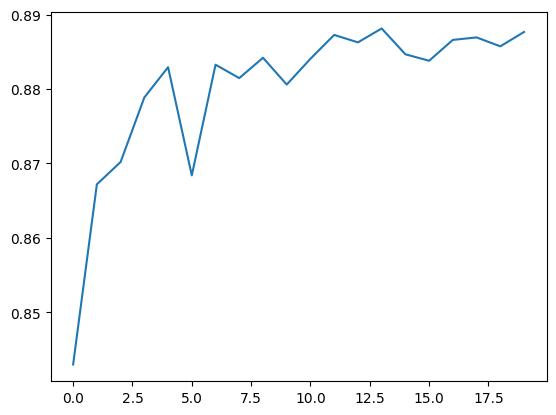

In [32]:
plt.plot(result.history['val_accuracy'])

## 드롭아웃

In [37]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 껐다 켰다 해볼게 # 학습을 도와주기 위한 층
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7270 - loss: 0.7686 - val_accuracy: 0.8400 - val_loss: 0.4447
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8367 - loss: 0.4580 - val_accuracy: 0.8589 - val_loss: 0.3904
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8520 - loss: 0.4100 - val_accuracy: 0.8605 - val_loss: 0.3806
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8571 - loss: 0.3893 - val_accuracy: 0.8726 - val_loss: 0.3496
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8606 - loss: 0.3755 - val_accuracy: 0.8717 - val_loss: 0.3499
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8673 - loss: 0.3488 - val_accuracy: 0.8736 - val_loss: 0.3451
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8748 - loss: 0.3414 - val_accuracy: 0.8781 - val_loss: 0.3381
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8722 - loss: 0.3439 -

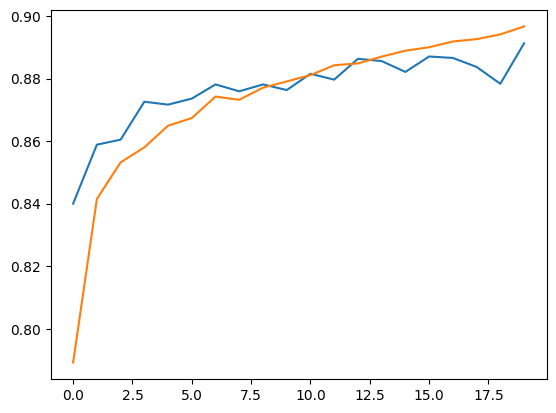

In [39]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

In [40]:
model.save_weights('my_model.weights.h5') # 가중치만 저장

In [41]:
model.save('my_model.keras') # 모델 자체를 저장

## 콜백

In [44]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cp = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
es = keras.callbacks.EarlyStopping(patience=2)
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[cp, es])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7276 - loss: 0.7800 - val_accuracy: 0.8434 - val_loss: 0.4423
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8372 - loss: 0.4569 - val_accuracy: 0.8581 - val_loss: 0.3905
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8536 - loss: 0.4087 - val_accuracy: 0.8634 - val_loss: 0.3782
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8592 - loss: 0.3849 - val_accuracy: 0.8640 - val_loss: 0.3700
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8645 - loss: 0.3740 - val_accuracy: 0.8684 - val_loss: 0.3591
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8673 - loss: 0.3627 - val_accuracy: 0.8759 - val_loss: 0.3453
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8719 - loss: 0.3478 - val_accuracy: 0.8774 - val_loss: 0.3389
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8746 - loss: 0.338

In [ ]:
# 학습의 목표: 손실률 감소, 정확도 증가

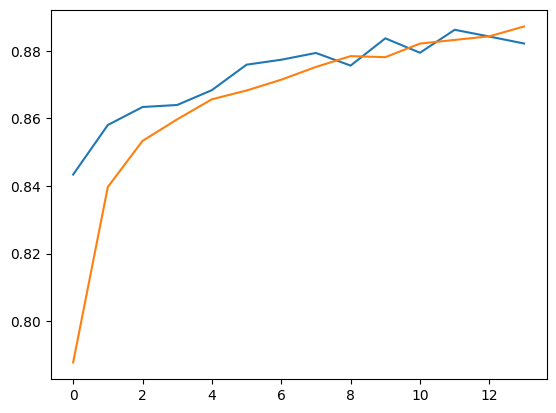

In [45]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])